# Homework 6: Percentiles, Bootstrap, A/B Testing
## Due Thursday Feb 27th, 11:59pm

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [1]:
#:
import math
import numpy as np
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
#:
import math
import numpy as np
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from client.api.notebook import Notebook
ok = Notebook('hw.ok')
_ = ok.auth(inline=True)

**You do not need to submit anything to Gradescope!** The short answer problems in this homework are optional but recommended.

**Important**: The `ok` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach).

## 1. Ramen Ratings

![](menya.jpg)

In this section, we will be using a ramen rating dataset to better our understanding of A/B testing. The dataset can be found on [kaggle](https://www.kaggle.com/residentmario/ramen-ratings), but the data has been cleaned and condensed for the purposes of this question. We (the writers) also recommend eating at [Menya Ultra](http://menya-ultra.com/) before completing this section, as we did before we wrote these questions.

The ramen data is recorded in a CSV file called `ramen.csv`. It contains five columns: `Brand`, `Variety`, `Style`, `Country`, `Stars`. Read this file into a table called `ramen`.

In [5]:
ramen = bpd.read_csv('ramen.csv')
ramen

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...
1973,Vifon,Nam Vang,Pack,Vietnam,2.50
1974,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00
1975,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00
1976,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.00


**Question 1.1**. You may have noticed that the `Stars` column contains strings instead of floats. Because we cannot do computations on strings, we need to convert these values into floats. In your `ramen` table, replace the `Stars` column so that all the data values are floats instead of strings. Find the mean star rating of all the ramen, and save it into a variable called `mean_star`.

In [6]:
#...mean_star
stars = ramen.get('Stars').apply(lambda x: float(x))
ramen = ramen.assign(Stars = stars)
mean_star = stars.mean()
mean_star

3.6545121334681503

In [ ]:
#: grade 1.1
_ = ok.grade('q1_1')

**Question 1.2.** Notice that there are two styles of ramen: "Cup" and "Pack". Using `ramen`, calculate the difference between the mean star ratings of Cup and Pack ramen. Assign your answer to `observed_difference`.

$$\text{observed difference} := \text{mean Cup stars} - \text{mean Pack stars}$$

In [8]:
#ramen.groupby('Style').mean().get('Stars')

Style
Cup     3.498500
Pack    3.700458
Name: Stars, dtype: float64

In [7]:
#...observed_difference
group_means = ramen.groupby('Style').mean().get('Stars')
group_means
observed_difference = group_means.iloc[0] - group_means.iloc[1]
observed_difference

-0.20195811518324724

In [ ]:
#: grade 1.2
_ = ok.grade('q1_2')

**Question 1.3.** Interpret in words the number you obtained for `observed_difference` and assign either 1, 2, 3, or 4 to `q1_3`.

1. In our sample, the mean cup stars is lower than the mean pack stars by about 20 percents.
2. In our sample, the mean cup stars is higher than the mean pack stars by about 20 percents.
3. In our sample, the mean cup stars is lower than the mean pack stars by about 0.20 stars.
4. In our sample, the mean cup stars is higher than the mean pack stars by about 0.20 stars.

In [9]:
#...q1_3
q1_3 = 3

In [ ]:
#: grade 1.3
_ = ok.grade('q1_3')

Now we want to conduct an A/B test (i.e. Permutation Test) to see if it is by chance that the average star rating for the cup ramen is less than pack ramen, or if the cup ramen really does have lower ratings than pack. 

To remind you on the process of an A/B test, here is the textbook reference for the [process](http://sierra.ucsd.edu/dsc10-book/chapters/12/1/AB_Testing.html). In your upcoming A/B test, we want to shuffle the `Stars` column and keep the `Style` column in the same order.


**Null hypothesis:** Star ratings of pack ramen and cup ramen come from the same distribution.  
**Alternative hypothesis:** Star ratings of cup ramen is typically lower than that of pack ramen.

Hint: To make your simulation go faster, drop the irrelevant columns before our A/B test. Make another table called `small_ramen` that only has the `Stars` and `Style` column, and shuffle using `small_ramen`.

**Question 1.4.** Use a permutation test to calculate 500 differences using random permutations of the data. Store your 500 differences in the `differences` array.

In [10]:
#DELETE
small_ramen = ramen.get(['Stars', 'Style'])

In [14]:
#...differences
differences = np.array([])
for i in np.arange(500):
    shuffled_stars = np.random.permutation(small_ramen.get('Stars'))
    shuffled = small_ramen.assign(Shuffled_Stars = shuffled_stars)
    group_means = shuffled.groupby('Style').mean().get('Shuffled_Stars')
    difference = group_means.iloc[1] - group_means.iloc[0]
    differences = np.append(differences, difference)
differences

array([ 0.04927872,  0.02079967, -0.03256261,  0.11083951,  0.02648109,
       -0.03371328,  0.19131443,  0.05172389, -0.0688806 , -0.00206988,
       -0.03299411, -0.03989812, -0.01141907,  0.0055533 , -0.00178221,
        0.00821422, -0.0102684 ,  0.02518659,  0.022238  ,  0.04338154,
       -0.0466583 ,  0.00612864, -0.01932992, -0.00149455, -0.01084373,
        0.11601752, -0.06765801, -0.01602174,  0.00526563, -0.0124259 ,
       -0.03155577,  0.05905941, -0.08736322,  0.03690903, -0.07513736,
        0.02453934,  0.07804545, -0.0265216 , -0.05687049,  0.09544932,
        0.04280621,  0.08207279,  0.06207992,  0.04611438, -0.05787733,
        0.0773982 , -0.03385711, -0.09311656, -0.05399382,  0.04093637,
       -0.04119263, -0.01932992, -0.020121  , -0.00322055, -0.0286791 ,
        0.01662849, -0.00350822,  0.01619699,  0.02144692,  0.05596699,
        0.05531974, -0.11274985, -0.05471299, -0.02306959,  0.07488111,
       -0.01041223, -0.01256974, -0.01832308, -0.00580955,  0.07

In [15]:
min(differences), max(differences)

(-0.12634213205351852, 0.19131442699243761)

In [ ]:
#: grade 1.4
_ = ok.grade('q1_4')

**Question 1.5.** Which of the follow choices best describes the purpose of the permutation test with regards to A/B testing? Assign either 1, 2, or 3 to `q1_5`.
1. The permutation test is a special case of the bootstrap and allows us to produce interval estimates.
2. The permutation test generates a null distribution which we can use in testing our hypothesis.
3. The permutation test mitigates noise in our data by generating new permutations of the data.


In [16]:
#...q1_5
q1_5 = 2

In [ ]:
#: grade 1.5
_ = ok.grade('q1_5')

**Question 1.6.** Compute a p-value for the hypothesis. That is, under the null hypothesis, compute the probability that we would have obtained a difference smaller than or equal to `observed_difference` by chance alone. Assign your answer to `p_val`.

In [17]:
#...p_val
p_val = np.count_nonzero(differences <= observed_difference) / len(differences)
p_val

0.0

In [ ]:
#: grade 1.6
_ = ok.grade('q1_6')

**Question 1.7.** Do you reject or fail to reject the null hypothesis at the 0.05 significance level? What conclusion can you make with regards to the star ratings of pack ramen and cup ramen?

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

...

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 1.8.** Suppose in this question you had shuffled the `Style` column and kept the `Stars` column in the same order. 
Which of the following is a true statement?

1. Your new p-value would be 1 - (old p-value), where new p-value is with `Style` shuffled and old p-value is with `Stars` shuffled.
2. There would be no difference in the A/B Test if we had shuffled the `Style` column instead.
3. We would conclude that pack ramen would have lower star ratings than cup ramen.
4. The `Style` column cannot be shuffled because there are only two unique values.


In [18]:
#...q1_8
q1_8 = 2

In [ ]:
#: grade 1.8
_ = ok.grade('q1_8')

## 2. Percentiles

**The General Definition**

> Let $p$ be a number between 0 and 100. The $p$th percentile of a collection is the smallest value in the collection that is *at least as large* as $p$% of all the values. 

![](percentile_example.jpg)

By this definition, any percentile between 0 and 100 can be computed for any collection of values and is always an element of the collection. Suppose there are $n$ elements in the collection. To find the $p$th percentile:

1. Sort the collection in increasing order.
2. Find $p$% of $n$: $\frac p{100}*n$. Call that $h$. If $h$ is an integer, define $k = h$. Otherwise, let $k$ be the smallest integer greater than $h$.
3. Take the $k$th element of the sorted collection.

**Question 2.1.** Assign the number of elements in `values` to the variable `n`. Define `k` as above -- your answer should be an integer. Assign the 36th percentile of the array `values` to `thirty_sixth_percentile`. You must use the variables provided for you when solving this problem. For this problem only, you may *not* use `np.percentile()`.

*Hint:* Using `math.ceil()` will round up a number to the next nearest whole number. `math` has already been imported for you.

In [19]:
#: don't change the values in this array!
values = np.array([10, 40, 42, 20, 100, 106, 102, 80, 30, 9, 180, 26, 131, 72])
values.sort()  # This line sorts the array
values

array([  9,  10,  20,  26,  30,  40,  42,  72,  80, 100, 102, 106, 131,
       180])

In [20]:
#...n
n = len(values)

In [21]:
#...k
k = math.ceil(36/100 * n)

In [22]:
#...thiry_sixth_percentile
thirty_sixth_percentile = values.item(k-1)
thirty_sixth_percentile

40

In [ ]:
_ = ok.grade('q2_1')

**Question 2.2.** The csv file `mcdonalds.csv` contains some selected information on menu items taken from [kaggle](https://www.kaggle.com/mcdonalds/nutrition-facts). The columns include `Category`, `Item`, `Calories`, `Sodium`, `Total Fat`, `Carbohydrates`, `Sugars`, `Protein`. Plot a histogram showing the distribution of `Carbohydrates`. Use the bins provided.

In [23]:
#Do not change this cell
mcd = bpd.read_csv('mcdonalds.csv',index_col = 0)
mcd_bins = np.arange(0, 200, 10)
mcd

,Category,Item,Calories,Sodium,Total Fat,Carbohydrates,Sugars,Protein
0,Breakfast,Egg McMuffin,300,750,13.0,31,3,17
1,Breakfast,Egg White Delight,250,770,8.0,30,3,18
2,Breakfast,Sausage McMuffin,370,780,23.0,29,2,14
3,Breakfast,Sausage McMuffin with Egg,450,860,28.0,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,880,23.0,30,2,21
...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,280,17.0,80,64,12
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,380,23.0,106,85,15
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,190,11.0,53,43,8
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,400,32.0,114,103,21


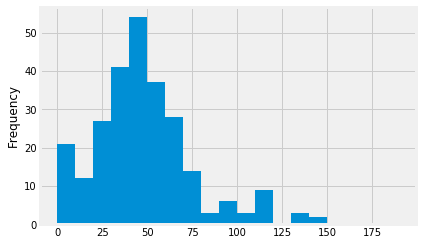

In [24]:
#DELETE
mcd.get('Carbohydrates').plot(kind='hist', bins = mcd_bins)

**Question 2.3.** Compare the calorie distribution between categories `Beef & Pork` **AND** `Chicken & Fish` **AND** `Snacks & Sides` (group 1) **versus** category `Smoothies & Shakes` (group 2). Find the absolute difference between the 95th percentile of the two group's `Calories` column and assign it to `absolute_difference`. You may use `np.percentile()`.

In [28]:
#DELETE
def beef_chicken_snacks(category):
    if category in ["Beef & Pork", "Chicken & Fish", "Snacks & Sides"]:
        return True
    return False

In [31]:
#DELETE
bc = mcd[mcd.get('Category').apply(beef_chicken_snacks)]
bc

,Category,Item,Calories,Sodium,Total Fat,Carbohydrates,Sugars,Protein
42,Beef & Pork,Big Mac,530,960,27.0,47,9,24
43,Beef & Pork,Quarter Pounder with Cheese,520,1100,26.0,41,10,30
44,Beef & Pork,Quarter Pounder with Bacon & Cheese,600,1440,29.0,48,12,37
45,Beef & Pork,Quarter Pounder with Bacon Habanero Ranch,610,1180,31.0,46,10,37
46,Beef & Pork,Quarter Pounder Deluxe,540,960,27.0,45,9,29
...,...,...,...,...,...,...,...,...
98,Snacks & Sides,Large French Fries,510,290,24.0,67,0,6
99,Snacks & Sides,Kids French Fries,110,65,5.0,15,0,1
100,Snacks & Sides,Side Salad,20,10,0.0,4,2,1
101,Snacks & Sides,Apple Slices,15,0,0.0,4,3,0


In [32]:
#...absolute_difference
absolute_difference = int(abs(np.percentile(bc.get('Calories'),95) - np.percentile(mcd[mcd.get('Category')=='Smoothies & Shakes'].get('Calories'),95)))
absolute_difference

100

In [ ]:
_ = ok.grade('q2_3')

**Question 2.4**. In an array `sugar_quartiles`, put the values for the first, second, and third quartiles (in that order) of the `Sugars` data provided, but only for items in the `Coffee & Tea` category. Make sure your values are in the correct order. You may use `np.percentile()`.

In [33]:
#...carb_quartiles
df = mcd[mcd.get("Category") =='Coffee & Tea'].get('Sugars')
first_quartile = np.percentile(df, 25)
second_quartile = np.percentile(df, 50)
third_quartile = np.percentile(df, 75)
sugar_quartiles = np.array([first_quartile, second_quartile, third_quartile])
sugar_quartiles

array([21. , 41. , 56.5])

In [ ]:
_ = ok.grade('q2_4')

**Quetion 2.5.** Say that McDonald's wants to add in a new Smoothie called `Mocha Almond Fudge (Large)` which has 90 grams of sugar. What would the `Sugars` percentile range of this new smoothie be out of the **Large** only `Smoothies & Shakes` `Category`? Give the result back as two numbers (1-100). The smallest percentile that will return the new drink should be returned as `lower_bound` and the largest percentile that will return the new drink should be labeled `upper_bound`. For example, if the new smoothie would be returned back when finding the 70th percentile and 80th percentile of the Large Smoothies, but not at the 69th and 81st percentile, then lower_bound = 70, upper_bound = 80.

**Hint:** If you're unsure about percentiles, refer back to the general definition above Question 1.

In [34]:
mcd[(mcd.get('Category') == 'Smoothies & Shakes') &(mcd.get('Item').str.contains('Large'))]

,Category,Item,Calories,Sodium,Total Fat,Carbohydrates,Sugars,Protein
234,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),340,65,1.0,79,70,4
237,Smoothies & Shakes,Strawberry Banana Smoothie (Large),330,80,1.0,74,70,5
240,Smoothies & Shakes,Mango Pineapple Smoothie (Large),340,60,1.0,78,72,4
243,Smoothies & Shakes,Vanilla Shake (Large),820,260,23.0,135,101,18
246,Smoothies & Shakes,Strawberry Shake (Large),850,260,24.0,140,123,18
249,Smoothies & Shakes,Chocolate Shake (Large),850,380,23.0,141,120,19
251,Smoothies & Shakes,Shamrock Shake (Large),820,260,23.0,135,115,18


In [77]:
sa = mcd[(mcd.get('Category') == 'Smoothies & Shakes') &(mcd.get('Item').str.contains('Large'))].get('Sugars')
sa = np.append(np.array(sa), 90)
sa

array([ 70,  70,  72, 101, 123, 120, 115,  90], dtype=int64)

In [85]:
#three sugars rows below 90
3/8 * 100

37.5

In [86]:
#three sugars rows above 90
4/8 * 100

50.0

In [35]:
#...lower_bound
#...upper_bound
lower_bound = 38
upper_bound = 50

38/ 100 * 8, 50/ 100 * 8

(3.04, 4.0)

In [ ]:
_ = ok.grade('q2_5')

**Question 2.6.** Shaun surveyed his class to find the total number of pets each of his classmates has. You can see his findings below in the table `pets`. For instance, 4 people have 0 pets, 5 have 1 pet, and so on. If one of his classmates, Jake, has some number of pets that falls in the 70th percentile of Shaun's data, how many pets does Jake have? Assign your answer to the value `jake_pets`. You may use `np.percentile()`.

*Hint*: A possilbe solution uses [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html). (Also described in part 4.3)

In [87]:
#: load the data“
pets = bpd.read_csv('pets.csv')
pets

,Pets,Frequency
0,0,4
1,1,5
2,2,6
3,3,3
4,4,2
5,5,1
6,10,1


In [88]:
#DELETE
# better solution
all_pets = np.repeat(pets.get('Pets'), pets.get('Frequency'))
jake_pets = np.percentile(all_pets,70)
jake_pets

2.6999999999999993

In [89]:
#...jake_pets

num_pets = np.array([])
for num in np.arange(pets.shape[0]):
    for frequency in np.arange(pets.get('Frequency').loc[num]):
        num_pets = np.append(num_pets, pets.get('Pets').loc[num])
jake_pets = np.percentile(num_pets,70)
jake_pets

2.6999999999999993

In [90]:
#num_pets

array([ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  4.,  4.,  5., 10.])

In [ ]:
_ = ok.grade('q2_6')

## 3. In-N-Out and Five Guys

Suppose you are a burger lover and a regular at In-N-Out. When you get your third In-N-Out burger of the week, you notice that your patty is extremely small. Your friend tells you In-N-Out patties have always been this small, but you are doubtful and decide to investigate.

Ideally, you would want to figure out the exact mean weight of all In-N-Out burger patties. However, it's not feasible to obtain the mean weight of *all* In-N-Out patties (i.e. the mean weight of the population).

**Question 3.1.** Complete the statement below by filling in the blanks.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Therefore, you want to collect a sample of In-N-Out patties to obtain a __________ statistic to estimate the ___________ parameter.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

Your other friend, who works at In-N-Out, agreed to weigh all the patties during his shift. He also does the same with Five Guys, since he works there as well. You decide to use this data as your sample.

**Question 3.2.** Your data is recorded in a CSV file called `burgers.csv`. Read this file into a table named `burgers`.

In [91]:
#...burgers
burgers = bpd.read_csv('burgers.csv')
burgers

,Place,Patty Weight (Ounces)
0,In-N-Out,2.039654
1,Five Guys,3.248876
2,In-N-Out,1.977957
3,Five Guys,3.403185
4,Five Guys,3.120933
...,...,...
95,Five Guys,3.193695
96,In-N-Out,2.061263
97,In-N-Out,2.150006
98,In-N-Out,1.739588


In [ ]:
_ = ok.grade('q3_2')

**Question 3.3.** For now, you only care about the weights of the In-N-Out patties. Create a new table with the rows of `burgers` where the value of `Place` is "In-N-Out". Assign this new table to `in_n_out`.

In [92]:
#...in_n_out
in_n_out = burgers[burgers.get('Place') == 'In-N-Out']
in_n_out

,Place,Patty Weight (Ounces)
0,In-N-Out,2.039654
2,In-N-Out,1.977957
5,In-N-Out,1.966266
6,In-N-Out,2.058461
8,In-N-Out,1.985435
...,...,...
93,In-N-Out,2.107875
94,In-N-Out,1.969110
96,In-N-Out,2.061263
97,In-N-Out,2.150006


In [ ]:
_ = ok.grade('q3_3')

**Question 3.4.** Calculate the mean weight of `in_n_out` patties and assign it to `in_n_out_mean`. 

In [93]:
#...in_n_out_mean
in_n_out_mean = in_n_out.get('Patty Weight (Ounces)').mean()
in_n_out_mean

2.0076955103010907

In [ ]:
_ = ok.grade('q3_4')

You're done! Or are you? You have a single point estimate for the true mean In-N-Out patty weight. However, you don't know how uncertain your estimate is and you don't know how much these estimates could vary. In other words, you don't have a sense of how good your estimate is. You may have gotten a particular statistic for one sample, but you could also get a completely different one for another sample.

This is where the idea of resampling via the [bootstrap](http://sierra.ucsd.edu/dsc10-book/chapters/13/2/Bootstrap.html) comes in. Let's assume that our original sample resembles the population fairly well. We can then resample from our original sample to produce even more estimates, which we can then use to produce an interval estimate for the true mean weight of In-N-Out patties.

**Question 3.5.** Fill out the following code to produce 1,000 bootstrapped estimates for the  *mean* weight of In-N-Out patties. Store your 1,000 estimates in the `in_n_out_means` array.

In [ ]:
in_n_out_means = ...
for ... in ...:
    resample = ...
    resample_mean = ...
    in_n_out_means = ...   

In [94]:
#DELETE    
in_n_out_means = np.array([])
for i in np.arange(1000):
    resample = in_n_out.sample(in_n_out.shape[0],replace = True)
    resample_mean = resample.get('Patty Weight (Ounces)').mean()
    in_n_out_means = np.append(in_n_out_means, resample_mean)

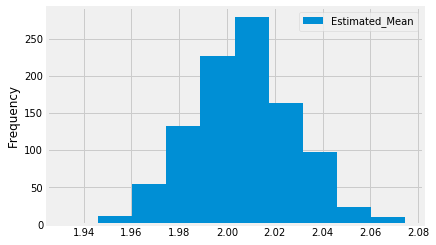

In [95]:
#: This cell displays a histogram of in_n_out_means
bpd.DataFrame().assign(Estimated_Mean = in_n_out_means).plot(kind = 'hist')

In [ ]:
_ = ok.grade('q3_5')

**Question 3.6.** Using the array `in_n_out_means`, compute an approximate 95% confidence interval for the true mean weight of In-N-Out patties. (Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.)

*Hint:* Use `percentile()`.

In [111]:
#...lower_bound
lower_bound = np.percentile(in_n_out_means,2.5)
lower_bound

1.9664692923116518

In [112]:
#...upper_bound
upper_bound = np.percentile(in_n_out_means,97.5)
upper_bound

2.0509957520767923

In [113]:
#: the confidence interval
print("Bootstrapped 95% confidence interval for the true mean weight of In-N-Out patties: [{:f}, {:f}]".format(lower_bound, upper_bound))

Bootstrapped 95% confidence interval for the true mean weight of In-N-Out patties: [1.966469, 2.050996]


In [ ]:
_ = ok.grade('q3_6')

**Question 3.7.** Which of the following would make the histogram narrower? Assign either 1 or 2 to `q3_7`.
1. Increasing the number of resamples (repetitions of bootstrap).
2. Starting with a larger original sample size.
3. Lowering the confidence interval to 90%.

In [114]:
#...q3_7
q3_7 = 2
q3_7

2

In [ ]:
_ = ok.grade('q3_7')

**Question 3.8.** Suppose you want to find the weight of the heaviest In-N-Out patty (maximum weight out of the entire population). Would your bootstrap procedure be effective in estimating the weight of the heaviest In-N-Out patty? Explain your answer below.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Your answer here*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 3.9.** Suppose you're wondering how heavy the average In-N-Out patty is compared to the average Five Guys patty. Using the same bootstrap procedure, compute an approximate 95% confidence interval for the true mean difference in weight between In-N-Out and Five Guys patties. Store your 1,000 estimates in the `difference_means` array. Use the original `burgers` table for this.

$$\text{difference_mean} := \text{mean weight of In-N-Out} - \text{mean weight of Five Guys}$$

In [ ]:
# You may need to add lines for additional code!
difference_means = ...
for ... in ...:
    resample = ...
    resample_mean = ...
    difference_means = ...

In [115]:
#DELETE
difference_means = np.array([])
for i in np.arange(1000):
    resample = burgers.sample(burgers.shape[0],replace = True).groupby('Place').mean().reset_index()
    resampled_in_n_out_mean = resample[resample.get('Place') ==  'In-N-Out'].get('Patty Weight (Ounces)').iloc[0]
    resampled_five_guys_mean = resample[resample.get('Place') ==  'Five Guys'].get('Patty Weight (Ounces)').iloc[0]
    resample_mean = resampled_in_n_out_mean - resampled_five_guys_mean
    difference_means = np.append(difference_means, resample_mean)

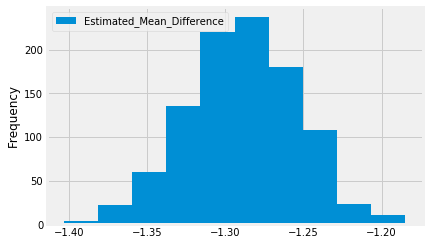

In [116]:
#: This cell displays a histogram of difference_means
bpd.DataFrame().assign(Estimated_Mean_Difference = difference_means).plot(kind = 'hist')

In [ ]:
_ = ok.grade('q3_9')

**Question 3.10.** Compute the 95% confidence interval for the mean difference in weights of In-N-Out and Five Guys patties. Assign the left and right endpoints to `left_endpoint` and `right_endpoint` respectively. 

In [117]:
#...left_endpoint
left_endpoint = np.percentile(difference_means,2.5)
left_endpoint

-1.3596768186021402

In [118]:
#...right_endpoint
right_endpoint = np.percentile(difference_means,97.5)
right_endpoint

-1.2229268597792533

In [ ]:
#: the confidence interval
print("Bootstrapped 95% confidence interval for the mean difference in weights of In-N-Out and Five Guys patties: [{:f}, {:f}]".format(left_endpoint, right_endpoint))

In [ ]:
_ = ok.grade('q3_10')

**Question 3.11:** Based on your histogram and confidence interval, would you say with high probability that the mean In-N-Out patty is lighter than the mean Five Guys patty? Explain your answer.

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

*Your answer here*

<hr style="color:Maroon;background-color:Maroon;border:0 none; height: 3px;">

**Question 3.12.** Would changing the units of weight from ounces to grams change your conclusion? Assign a boolean (`True` if it would and `False` otherwise) to the name `q3_12`.

In [119]:
#...q3_12
q3_12 = False

In [ ]:
_ = ok.grade('q3_12')

# Finish Line

Congratulations, you're done with the lab!  Be sure to

- **Verify that all tests pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**
- **You do not need to submit anything toGradescope**

In [ ]:
#: Run all tests at once
import os
_ = [ok.grade(q[:-3]) for q in os.listdir('tests') if q.startswith('q')]

## Before submitting, select "Kernel" -> "Restart & Run All" from the menu!

Then make sure that all of your cells ran without error.

In [ ]:
#: Submit your notebook
_ = ok.submit()